# --------------------------------------- Workshop #4 -------------------------------------


* This workshop includes marked tasks that comprise 15% of your final mark in this module. 

* You need to read the examples in Lecture #4 and Lecture #4 exercise to complete the tasks. 

# Tasks

## TASK 4.1:  Download the adult_WS4 dataset. Apply K-Means and Hierarchical clustering to three optional columns in the dataset. Find the optimum number of clusters for both clustering methods (10%).

## NOTE: You should comment on your code wherever necessary and briefly explain what the code is doing

In [83]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################

#Import the important things
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
#import seaborn as sns
#import plotly.express as px

In [84]:
df = pd.read_csv('C:/Users/Uche Buzz/Desktop/School stuff/Data Mining and Infomatics/Dataset/adult_WS4.csv')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [86]:
df.dropna( inplace = True )

In [87]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

# transform data

df[['education','workclass','marital-status', 'occupation',
       'sex', 'native-country','race','relationship']] = encoder.fit_transform(df[['education',
                                                                                      'workclass','marital-status', 'occupation', 'sex', 'native-country','race','relationship']])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9765 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9765 non-null   int64  
 1   workclass       9765 non-null   float64
 2   fnlwgt          9765 non-null   int64  
 3   education       9765 non-null   float64
 4   education-num   9765 non-null   int64  
 5   marital-status  9765 non-null   float64
 6   occupation      9765 non-null   float64
 7   relationship    9765 non-null   float64
 8   race            9765 non-null   float64
 9   sex             9765 non-null   float64
 10  capital-gain    9765 non-null   int64  
 11  capital-loss    9765 non-null   int64  
 12  hours-per-week  9765 non-null   int64  
 13  native-country  9765 non-null   float64
 14  income          9765 non-null   object 
dtypes: float64(8), int64(6), object(1)
memory usage: 1.2+ MB


In [171]:
S = df.iloc[:, [0, 2, 11]]


In [172]:
S

,age,education,hours-per-week
0,29,12.0,40
1,36,15.0,45
2,25,9.0,25
3,47,8.0,48
4,33,11.0,40
...,...,...,...
9995,19,15.0,30
9996,53,11.0,40
9997,30,11.0,40
9998,41,8.0,40


In [173]:
#normalising the input data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
S = scaler.fit_transform(S)

In [174]:
S

array([[0.16438356, 0.8       , 0.39795918],
       [0.26027397, 1.        , 0.44897959],
       [0.10958904, 0.6       , 0.24489796],
       ...,
       [0.17808219, 0.73333333, 0.39795918],
       [0.32876712, 0.53333333, 0.39795918],
       [0.05479452, 1.        , 0.39795918]])

In [175]:
S = pd.DataFrame(S)

In [176]:
S

,0,1,2
0,0.164384,0.800000,0.397959
1,0.260274,1.000000,0.448980
2,0.109589,0.600000,0.244898
3,0.410959,0.533333,0.479592
4,0.219178,0.733333,0.397959
...,...,...,...
9760,0.027397,1.000000,0.295918
9761,0.493151,0.733333,0.397959
9762,0.178082,0.733333,0.397959
9763,0.328767,0.533333,0.397959


## Elbow plot
Getting the optimal number of clusters you plan to use for your K-means. you first define a range

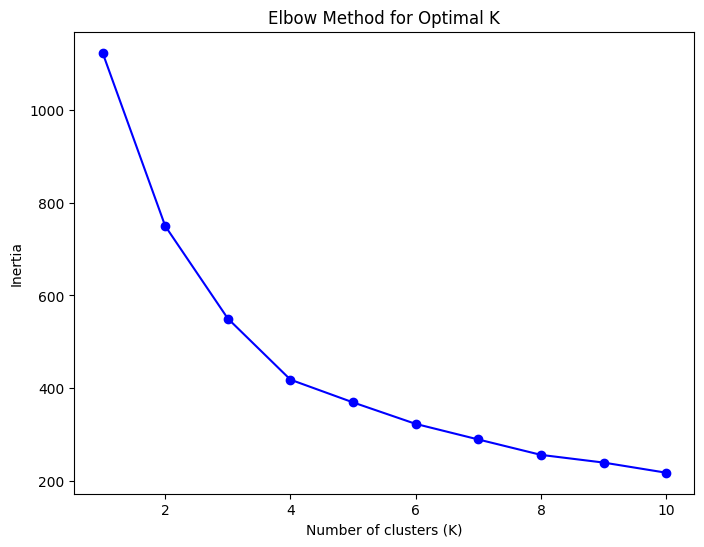

In [177]:
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(S)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
#plt.xticks(k_values)
#plt.grid(True)
plt.show()

In [178]:
#k-means clustering
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init="auto")

In [179]:
kmeans.fit(S)

KMeans(n_clusters=3, random_state=0)

In [180]:
cluster_centers = kmeans.cluster_centers_

In [181]:
# print the centre positions of the clusters
centers = kmeans.cluster_centers_
print('Centroids:', centers, '\n')


Centroids: [[0.26325321 0.20800758 0.37696358]
 [0.17766818 0.79365788 0.40070166]
 [0.47958393 0.731972   0.42010573]] 



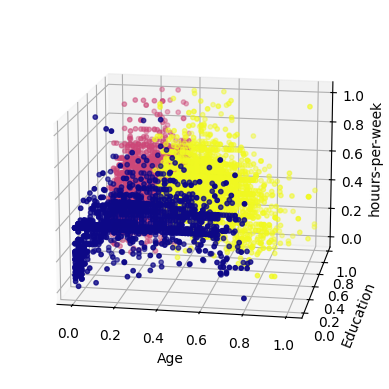

In [214]:
# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.azim = -80
ax.dist = 10
ax.elev = 15

# Store the normalization of the color encodings based on the number of clusters
nm = Normalize(vmin=0, vmax=len(kmeans.cluster_centers_) - 1)

# Plot the clustered data
scatter1 = ax.scatter(S.iloc[:, 0], S.iloc[:, 1], S.iloc[:, 2], c=kmeans.predict(S), s=10, cmap='plasma', norm=nm)

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_zlabel('houurs-per-week')

plt.show()

## Hierarchical clustering

In [197]:
#Import the important classes

import sys
import matplotlib
matplotlib.use('Agg')
##########
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering


In [198]:
from sklearn.cluster import AgglomerativeClustering

# Fitting my data
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = hierarchical_cluster.fit_predict(S)


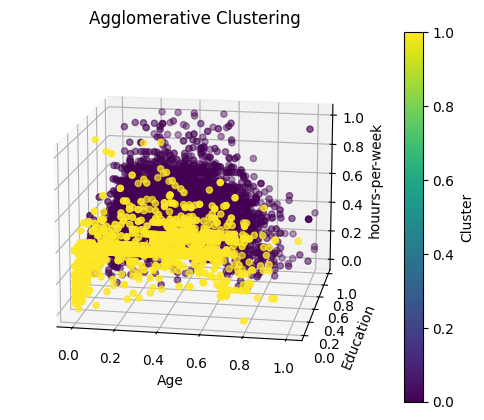

In [215]:
# Plot the clusters in 3D
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(S.iloc[:, 0], S.iloc[:, 1], S.iloc[:, 2], 
                     c=hierarchical_cluster.labels_, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_zlabel('houurs-per-week')
plt.title('Agglomerative Clustering')

ax.azim = -80
ax.dist = 10
ax.elev = 15

# Create a colorbar manually
plt.colorbar(scatter, ax=ax, label='Cluster')

plt.show()



In [200]:
# Print S and cluster labels for reference
print("Data:")
print(S)
print("\nCluster Labels:")
print(hierarchical_cluster.labels_)

# Save the plot
#plt.savefig(sys.stdout.buffer)
#sys.stdout.flush()

Data:
             0         1         2
0     0.164384  0.800000  0.397959
1     0.260274  1.000000  0.448980
2     0.109589  0.600000  0.244898
3     0.410959  0.533333  0.479592
4     0.219178  0.733333  0.397959
...        ...       ...       ...
9760  0.027397  1.000000  0.295918
9761  0.493151  0.733333  0.397959
9762  0.178082  0.733333  0.397959
9763  0.328767  0.533333  0.397959
9764  0.054795  1.000000  0.397959

[9765 rows x 3 columns]

Cluster Labels:
[0 0 0 ... 0 0 0]


# Silhoutte score

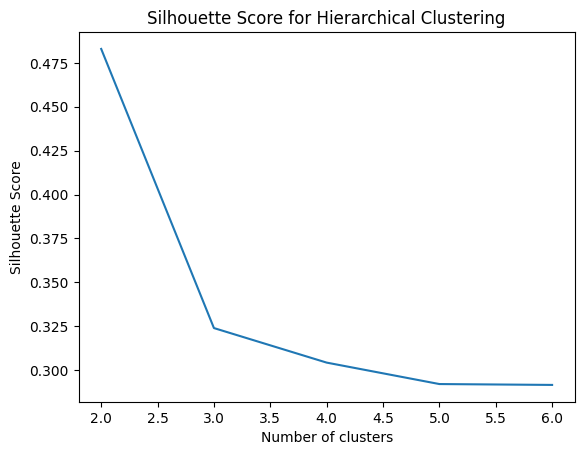

In [204]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(S)
    silhouette_avg = silhouette_score(S, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.show()

## Task 4.2: Apply the PCA method to the dataset and extract the first two principal components (n_components=2). Plot the scatter plot of the dataset's first two components for the two classes of the income column (5%). 

## NOTE 1: You should comment on your code wherever necessary and briefly explain what the code is doing.

## NOTE 2: You need to encode the categorical columns, normalise the dataset, and remove the income column before applying the PCA method. 

## HINT: See the examples in the last three slides in Lecture #4 or the Lecture #4 exercise notebook

In [201]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################

import pandas as pd
import numpy as np




In [219]:
ad = pd.read_csv('C:/Users/Uche Buzz/Desktop/School stuff/Data Mining and Infomatics/Dataset/adult_WS4.csv')

In [221]:
ad.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [245]:

ad.dropna(inplace=True)

In [246]:
X = ad.drop('income',axis=1)
y = ad['income']

In [247]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [248]:
cols_encode = X.select_dtypes(include=['object']).columns
OE = OrdinalEncoder()
X[cols_encode] = OE.fit_transform(X[cols_encode])

In [249]:
# preprocess data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the features


In [252]:
# define and implement PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2) # states that i want two compenents out of the full input set
X_pca = pca.fit_transform(X)


In [253]:
# creating a new dataframe with the 2 principal components from my input and assigning column names to it
X_newdf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
X_newdf.reset_index(drop=True, inplace=True) # resetting the index of my princiapl components table



In [255]:
X_newdf

,principal component 1,principal component 2
0,-1.605211,-2.054174
1,0.977744,-0.190461
2,-2.944731,-1.340080
3,1.387613,0.496303
4,0.696372,0.403287
...,...,...
9760,-1.806141,-1.794439
9761,0.593246,-0.395297
9762,0.581946,0.720474
9763,-1.164348,-0.942638


In [256]:
ad['income'] 


0        >50K
1       <=50K
2       <=50K
3        >50K
4       <=50K
        ...  
9995    <=50K
9996    <=50K
9997    <=50K
9998     >50K
9999    <=50K
Name: income, Length: 9765, dtype: object

AssertionError: 

<Figure size 640x480 with 0 Axes>

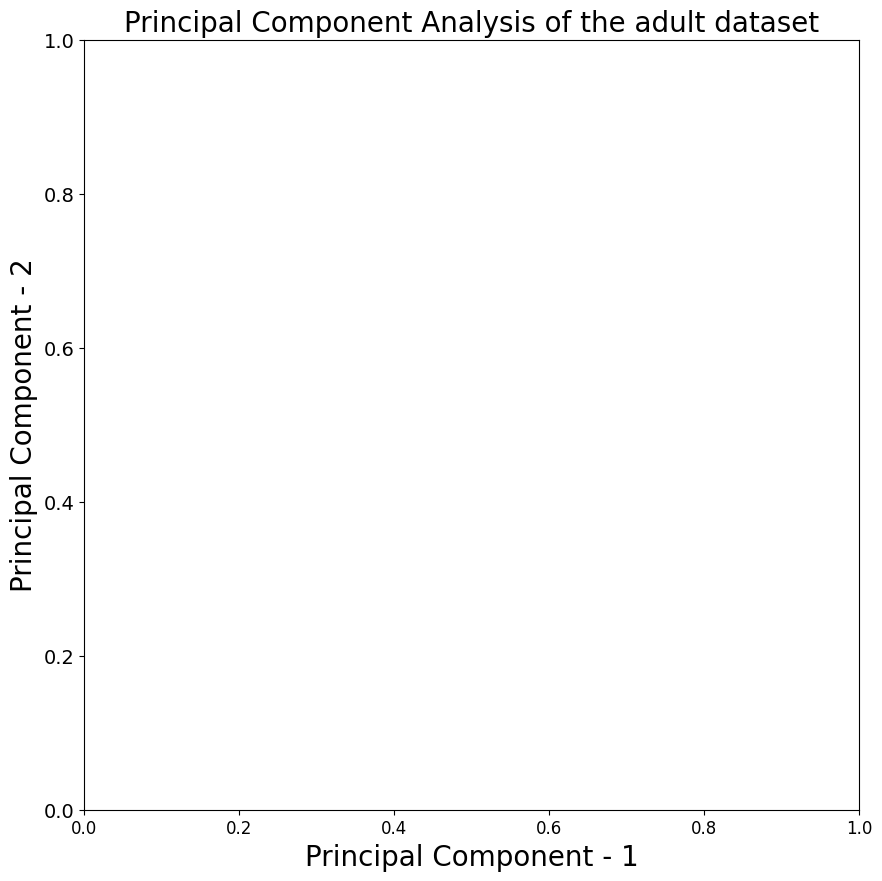

In [254]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of the adult dataset",fontsize=20)
targets_income = ['>50K', '<=50K']
colors = ['y', 'r']
for target, color in zip(targets_income,colors):
    indicesToKeep = ad['income'] == target
    plt.scatter(X_newdf.loc[indicesToKeep, 'principal component 1']
                , X_newdf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets_income,prop={'size': 15})